In [522]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [523]:
gmr = pd.read_csv("DF/grand_master_report.csv")

# Dataset Prep

In [524]:
gmr = gmr.rename(columns={"Day\nDate": "Date"})
#gmr["year_month"] = pd.to_datetime(gmr["Date"], format='%m.%y')
gmr["Date"] = pd.to_datetime(gmr["Date"], format='%d.%m.%y')
gmr = gmr[["Date", 
     "TotalSupply",
     "MealsSaved",
     "NewRegisteredUsers",
     "All-TimeRegisteredUsers", 
     "PayingUsers", 
     "NewPayingUsers", 
     "All-TimePayingUsers", 
     "ActiveUsers"]]
gmr = gmr.sort_index(ascending=False)
gmr.sort_values(by = 'Date',inplace=True)
gmr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 499 to 0
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     500 non-null    datetime64[ns]
 1   TotalSupply              500 non-null    int64         
 2   MealsSaved               500 non-null    int64         
 3   NewRegisteredUsers       500 non-null    int64         
 4   All-TimeRegisteredUsers  500 non-null    int64         
 5   PayingUsers              500 non-null    int64         
 6   NewPayingUsers           500 non-null    int64         
 7   All-TimePayingUsers      500 non-null    int64         
 8   ActiveUsers              500 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 39.1 KB


In [525]:
#Adding month, year column
gmr["year"] = gmr['Date'].apply(lambda x:str(x.isocalendar()[0]))
gmr['month'] = pd.to_datetime(gmr['Date']).dt.month
gmr['year_wk'] = gmr['Date'].apply(lambda x:str(x.isocalendar()[0]) + '-' + str(x.isocalendar()[1]).zfill(2))
gmr.head(3)

,Date,TotalSupply,MealsSaved,NewRegisteredUsers,All-TimeRegisteredUsers,PayingUsers,NewPayingUsers,All-TimePayingUsers,ActiveUsers,year,month,year_wk
499,2020-10-08,7514,5182,1455,1002213,4186,587,243006,47527,2020,10,2020-41
498,2020-10-09,7934,5542,1487,1003693,4060,473,243479,34784,2020,10,2020-41
497,2020-10-10,6757,4961,2813,1006490,3103,502,243981,34595,2020,10,2020-41


In [526]:
gmr_w=gmr.groupby(['year_wk','year'])\
[['TotalSupply','MealsSaved','PayingUsers','NewPayingUsers','NewRegisteredUsers', "ActiveUsers"]]\
.sum()\
.reset_index()

In [527]:
gmr_m=gmr.groupby(['year','month'])\
[['TotalSupply','MealsSaved','PayingUsers','NewPayingUsers','NewRegisteredUsers', "ActiveUsers"]]\
.sum()\
.reset_index()

In [528]:
#Renaming
gmr_w = gmr_w.rename(columns={"MealsSaved": "Demand", "year_wk": "week", 
                              "TotalSupply": "Supply", "PayingUsers": "Paying Users", 
                              "NewPayingUsers": "New Paying Users", 
                              "NewRegisteredUsers": "New Registered Users", 
                              "ActiveUsers": "Active Users"})

In [529]:
gmr_w["Demand / Paying User"] = gmr_w["Demand"]/gmr_w["Paying Users"]
gmr_w["Sold Ratio"] = gmr_w["Demand"]/gmr_w["Supply"]
gmr_w["Demand / Active User"] = gmr_w["Demand"]/gmr_w["Active Users"]

# Plots

In [530]:
gmr_w.head(3)

,week,year,Supply,Demand,Paying Users,New Paying Users,New Registered Users,Active Users,Demand / Paying User,Sold Ratio,Demand / Active User
0,2020-41,2020,25279,18014,13994,1978,7726,149145,1.287266,0.712607,0.120782
1,2020-42,2020,48272,34568,27069,3531,10214,280831,1.277033,0.716109,0.123092
2,2020-43,2020,48852,35554,27895,3458,11785,311811,1.274565,0.727790,0.114024


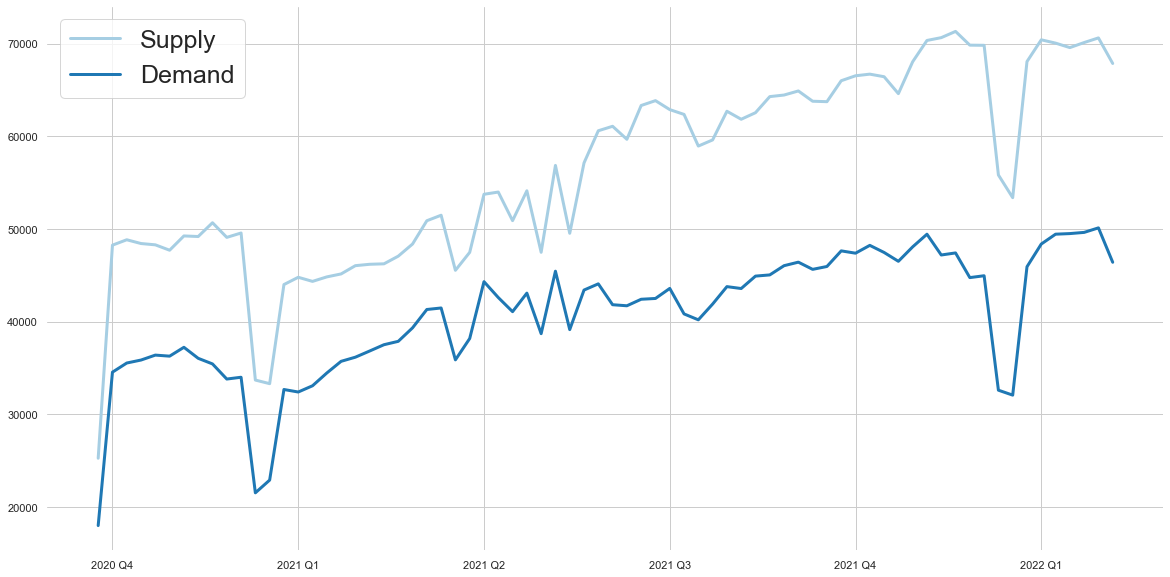

In [617]:
plt.figure(figsize=(20,10))
sns.set_palette("Paired")
sns.lineplot(x="week", y="Supply",size=None, style=None, data=gmr_w, label="Supply", linewidth = 3)
c = sns.lineplot(x="week", y="Demand",size=None, style=None, data=gmr_w, label="Demand", linewidth = 3)
#c2 = plt.twinx()
#c = sns.lineplot(x="week", y="Sold Ratio", data=gmr_w, ax=c2, color="Black", label = "Sold Ratio")

#c.set_title("Demand and Supply Growth")
c.set_xticks(range(1, len(gmr_w), 13))
c.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2',"2021 Q3","2021 Q4","2022 Q1"])
c.set(xlabel='', ylabel='')
sns.despine(top=True, right=True, left=True, bottom=True)
#c2.grid(False);
c.grid(True)
plt.legend(loc="upper left", fontsize='25');

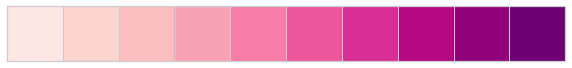

In [532]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

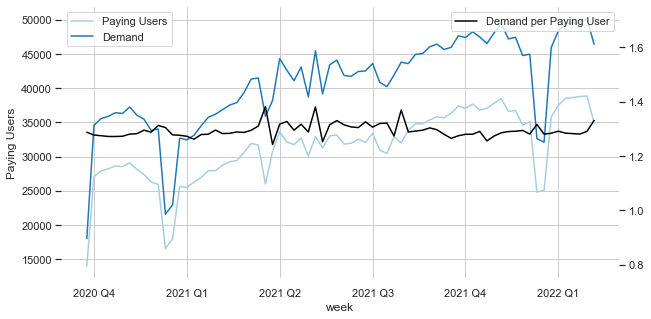

In [582]:
plt.figure(figsize=(10,5))
sns.set_palette("Paired")

sns.lineplot(x="week", y="Paying Users", data=gmr_w, label="Paying Users", legend = "brief")
sns.lineplot(x="week", y="Demand", data=gmr_w, label="Demand", legend = "brief")
d2 = plt.twinx()
d2.set(ylim=(0.75, 1.75))
d = sns.lineplot(x="week", y="Demand / Paying User", data=gmr_w, label="Demand per Paying User", legend = "brief", ax=d2, color="Black")

d.set_xticks(range(1, len(gmr_w), 13))
d.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2',"2021 Q3","2021 Q4","2022 Q1"])
sns.despine(top=True, right=True, left=True, bottom=True)
d.set(xlabel='', ylabel='')
d2.grid(False)
#d.grid(True);

[Text(0.5, 0, ''), Text(0, 0.5, '')]

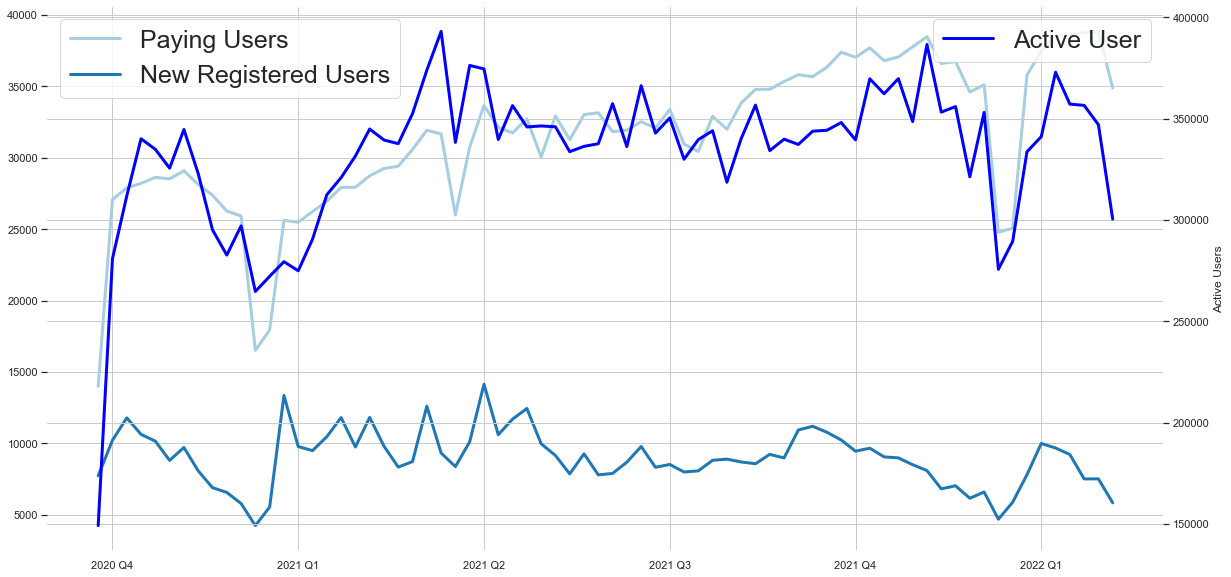

In [645]:
plt.figure(figsize=(20,10))
sns.set_palette("Paired")

sns.lineplot(x="week", y="Paying Users", data=gmr_w, label="Paying Users", linewidth = 3)
e= sns.lineplot(x="week", y="New Registered Users", data=gmr_w, label="New Registered Users", linewidth = 3)
e2 = plt.twinx()
#e2.set(ylim=(None, None))
e2 = sns.lineplot(x="week", y="Active Users", data=gmr_w, label="Active User", ax=e2, color= "Blue", linewidth = 3)
e.legend(fontsize='25')
e2.legend(fontsize='25')
e.set_xticks(range(1, len(gmr_w), 13))
e.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2',"2021 Q3","2021 Q4","2022 Q1"])
sns.despine(top=True, right=True, left=True, bottom=True)
e.set(xlabel='', ylabel='')
#plt.legend(loc="upper right", fontsize='xx-large')
#plt.legend(loc="upper left", fontsize='xx-large')
#e2.grid(False)
#e.grid(True);

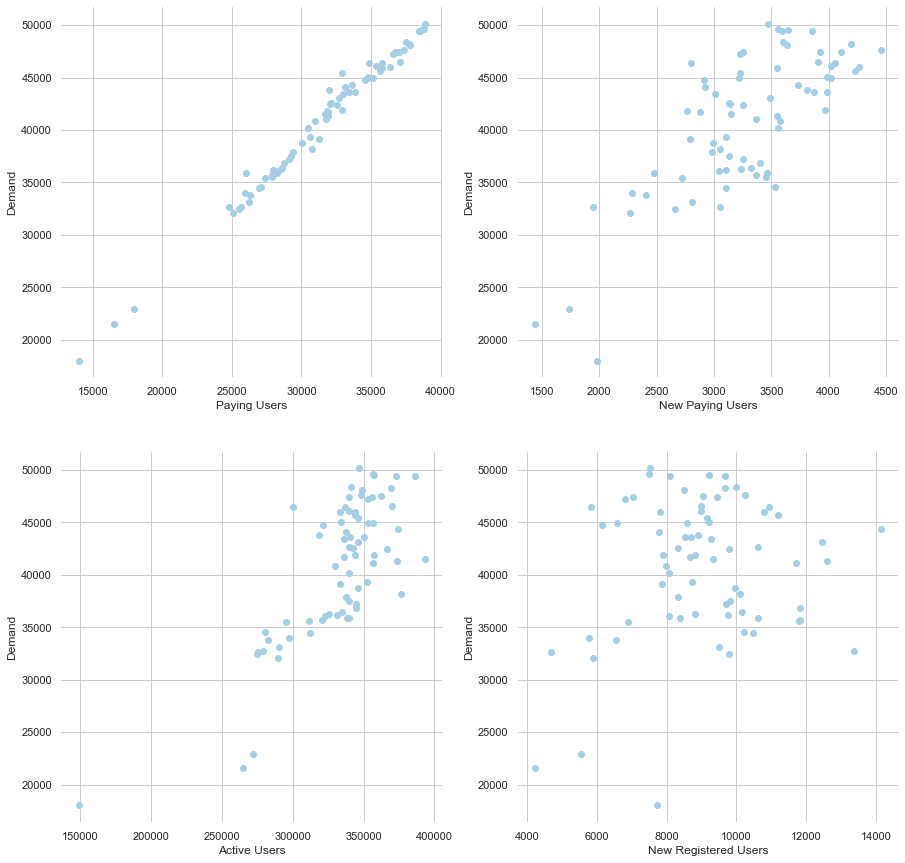

In [635]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0,0].scatter(x="Paying Users", y="Demand", data=gmr_w)
axs[0,1].scatter(x="New Paying Users", y="Demand", data=gmr_w)
axs[1,0].scatter(x="Active Users", y="Demand", data=gmr_w)
axs[1,1].scatter(x="New Registered Users", y="Demand", data=gmr_w)
sns.despine(top=True, right=True, left=True, bottom=True)
axs[0,0].spines['left'].set_linewidth(0.5)
axs[1,0].spines['left'].set_linewidth(0.5)
axs[0,1].spines['left'].set_linewidth(0.5)
axs[1,1].spines['left'].set_linewidth(0.5)
axs[0,0].spines['bottom'].set_linewidth(0.5)
axs[1,0].spines['bottom'].set_linewidth(0.5)
axs[0,1].spines['bottom'].set_linewidth(0.5)
axs[1,1].spines['bottom'].set_linewidth(0.5)
axs[0,0].set(xlabel="Paying Users", ylabel="Demand")
axs[0,1].set(xlabel="New Paying Users", ylabel="Demand")
axs[1,0].set(xlabel="Active Users", ylabel="Demand")
axs[1,1].set(xlabel="New Registered Users", ylabel="Demand");

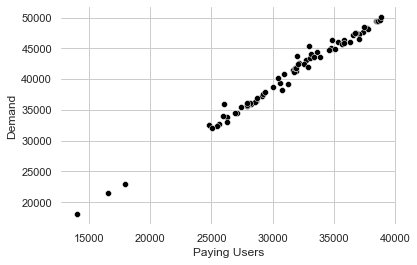

In [552]:
g = sns.scatterplot(x="Paying Users", y="Demand",size=None, style=None, data=gmr_w, color= "Black")
sns.despine(top=True, right=True, left=True, bottom=True);
g.grid(True);

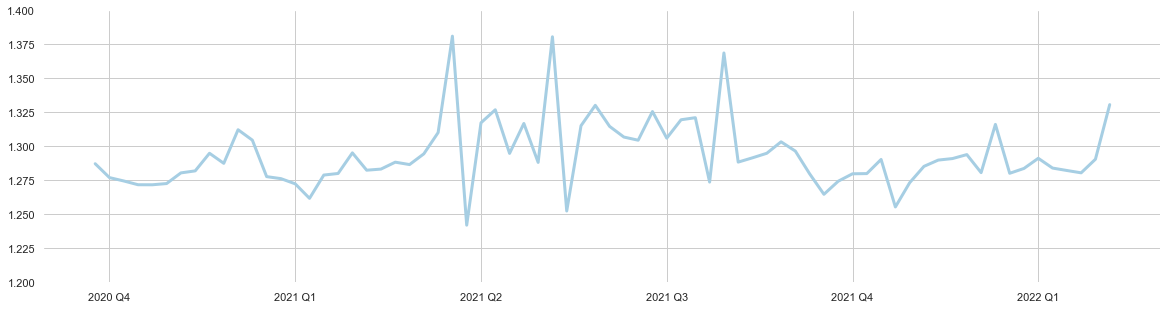

In [630]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
f = sns.lineplot(x="week", y="Demand / Paying User",size=None, style=None, data=gmr_w, palette=None, linewidth = 3)
f.set_xticks(range(1, len(gmr_w), 13))
f.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2',"2021 Q3","2021 Q4","2022 Q1"])
#f.set_yticklabels(['1.3',"1.35","1.4","1.45"])
sns.despine(top=True, right=True, left=True, bottom=True)
f.set(xlabel='', ylabel='')
f.set(ylim=(1.2, 1.4));

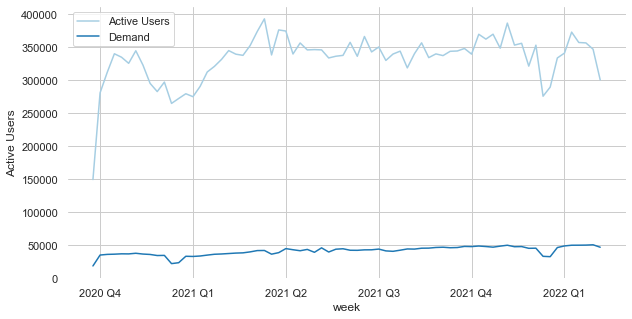

In [559]:
plt.figure(figsize=(10,5))
sns.set_palette("Paired")

sns.lineplot(x="week", y="Active Users", data=gmr_w, label="Active Users", legend = "brief")
h = sns.lineplot(x="week", y="Demand", data=gmr_w, label="Demand", legend = "brief")

h.set_xticks(range(1, len(gmr_w), 13))
h.set_xticklabels(['2020 Q4','2021 Q1','2021 Q2',"2021 Q3","2021 Q4","2022 Q1"])
sns.despine(top=True, right=True, left=True, bottom=True)
h.grid(True)

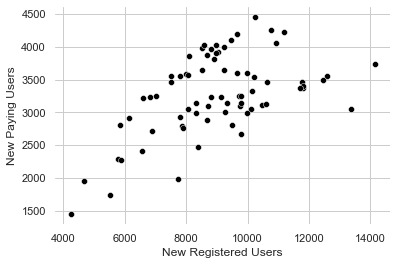

In [558]:
i = sns.scatterplot(x="New Registered Users", y="New Paying Users",size=None, style=None, data=gmr_w, color= "Black")
sns.despine(top=True, right=True, left=True, bottom=True);

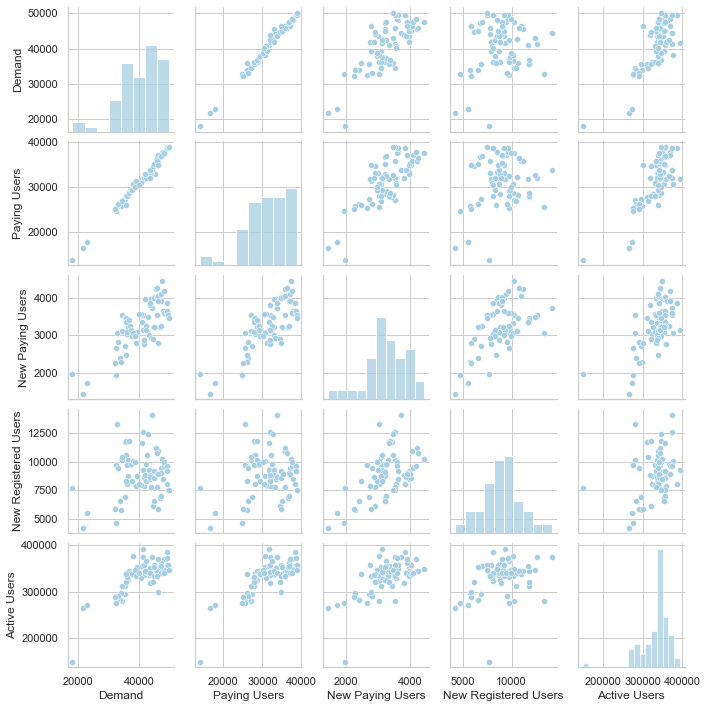

In [540]:
reduced_gmr_w = gmr_w[["Demand", "Paying Users", "New Paying Users", "New Registered Users", "Active Users"]]
sns.pairplot(reduced_gmr_w, height=2)
plt.show()

### SWISS MAP PLOT

In [541]:
df = pd.read_csv("DF/group_data_clean_inclCluster.csv")
df.head(3)

,Unnamed: 0,Store ID,Item ID,Store Category,Store Segment,Store Region,City,Item Price,Region Language,Region Type,lat,lng,Cluster
0,0,35,34,Indie - Outbound,Bakery,Vaud,Salavaux,6.9,french,urban,46.918363,7.022345,3
1,1,57,73,Indie - Outbound,Bakery,Freiburg,Sâles,6.9,french,urban,46.641510,7.062369,3
2,2,58,337173,Indie - Outbound,Bakery,Freiburg,Ursy,4.9,french,urban,46.637755,6.843907,3


/var/folders/sk/356yz4gx0c169x5ft8052vkc0000gn/T/ipykernel_19126/1801296484.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['','','',"","",""])
/var/folders/sk/356yz4gx0c169x5ft8052vkc0000gn/T/ipykernel_19126/1801296484.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(['','','',"","",""])


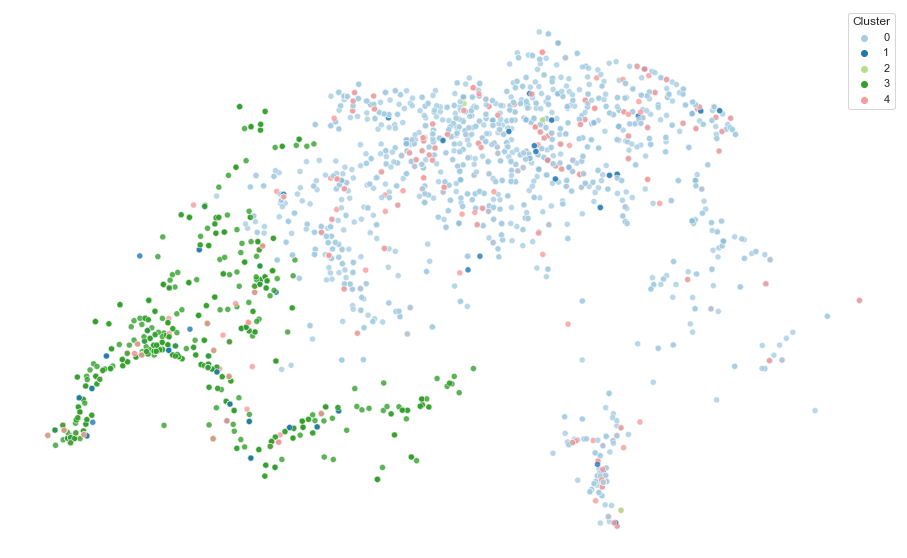

In [542]:
sns.set_style("white")
plt.figure(figsize=(16, 10))
a = sns.scatterplot(x="lng", 
            y="lat", 
            hue="Cluster", 
            size=None, 
            data=df, 
            palette="Paired", 
            ci=95, 
            n_boot=1000, 
            alpha=0.8, 
            legend='auto');
sns.despine(top=True, right=True, left=True, bottom=True)
a.set_xticklabels(['','','',"","",""])
a.set_yticklabels(['','','',"","",""])
a.set(xlabel='', ylabel='');

/var/folders/sk/356yz4gx0c169x5ft8052vkc0000gn/T/ipykernel_19126/1889762865.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['','','',"","",""])
/var/folders/sk/356yz4gx0c169x5ft8052vkc0000gn/T/ipykernel_19126/1889762865.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(['','','',"","",""])


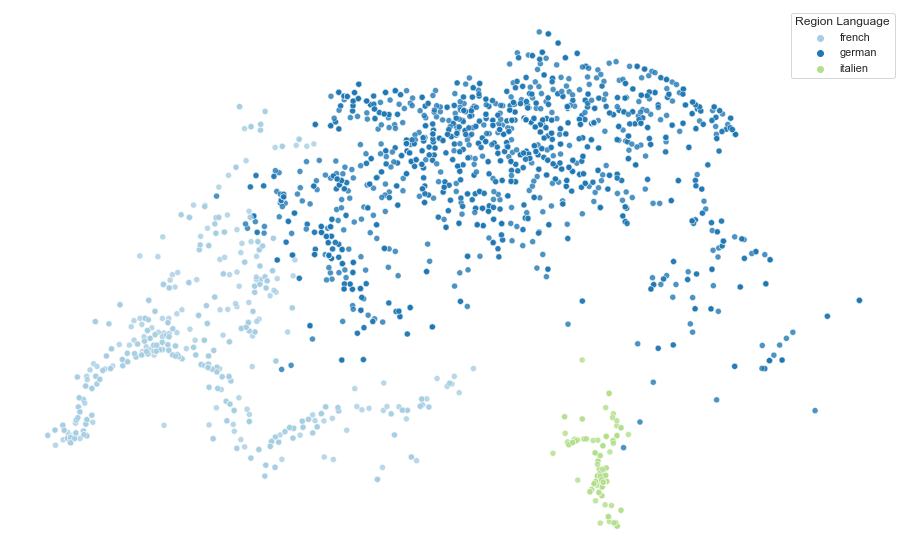

In [596]:
sns.set_style("white")
plt.figure(figsize=(16, 10))
a = sns.scatterplot(x="lng", 
            y="lat", 
            hue="Region Language", 
            size=None, 
            data=df, 
            palette="Paired", 
            ci=95, 
            n_boot=1000, 
            alpha=0.8, 
            legend='auto');
sns.despine(top=True, right=True, left=True, bottom=True)
a.set_xticklabels(['','','',"","",""])
a.set_yticklabels(['','','',"","",""])
a.set(xlabel='', ylabel='');